Importing Libraries

In [691]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [741]:
df = pd.read_csv('E:\\LR\\day (1).csv')

In [742]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Checking for nulls. 

In [743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [744]:
df.dteday.describe()

count            730
unique           730
top       01-01-2018
freq               1
Name: dteday, dtype: object

In [745]:
df.shape

(730, 16)

Creating a bar graph function to visualize

Ride count by date

In [746]:
# renaming few columns for better readibility
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [747]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [748]:
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [749]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [750]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [751]:
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [752]:
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [753]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [754]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


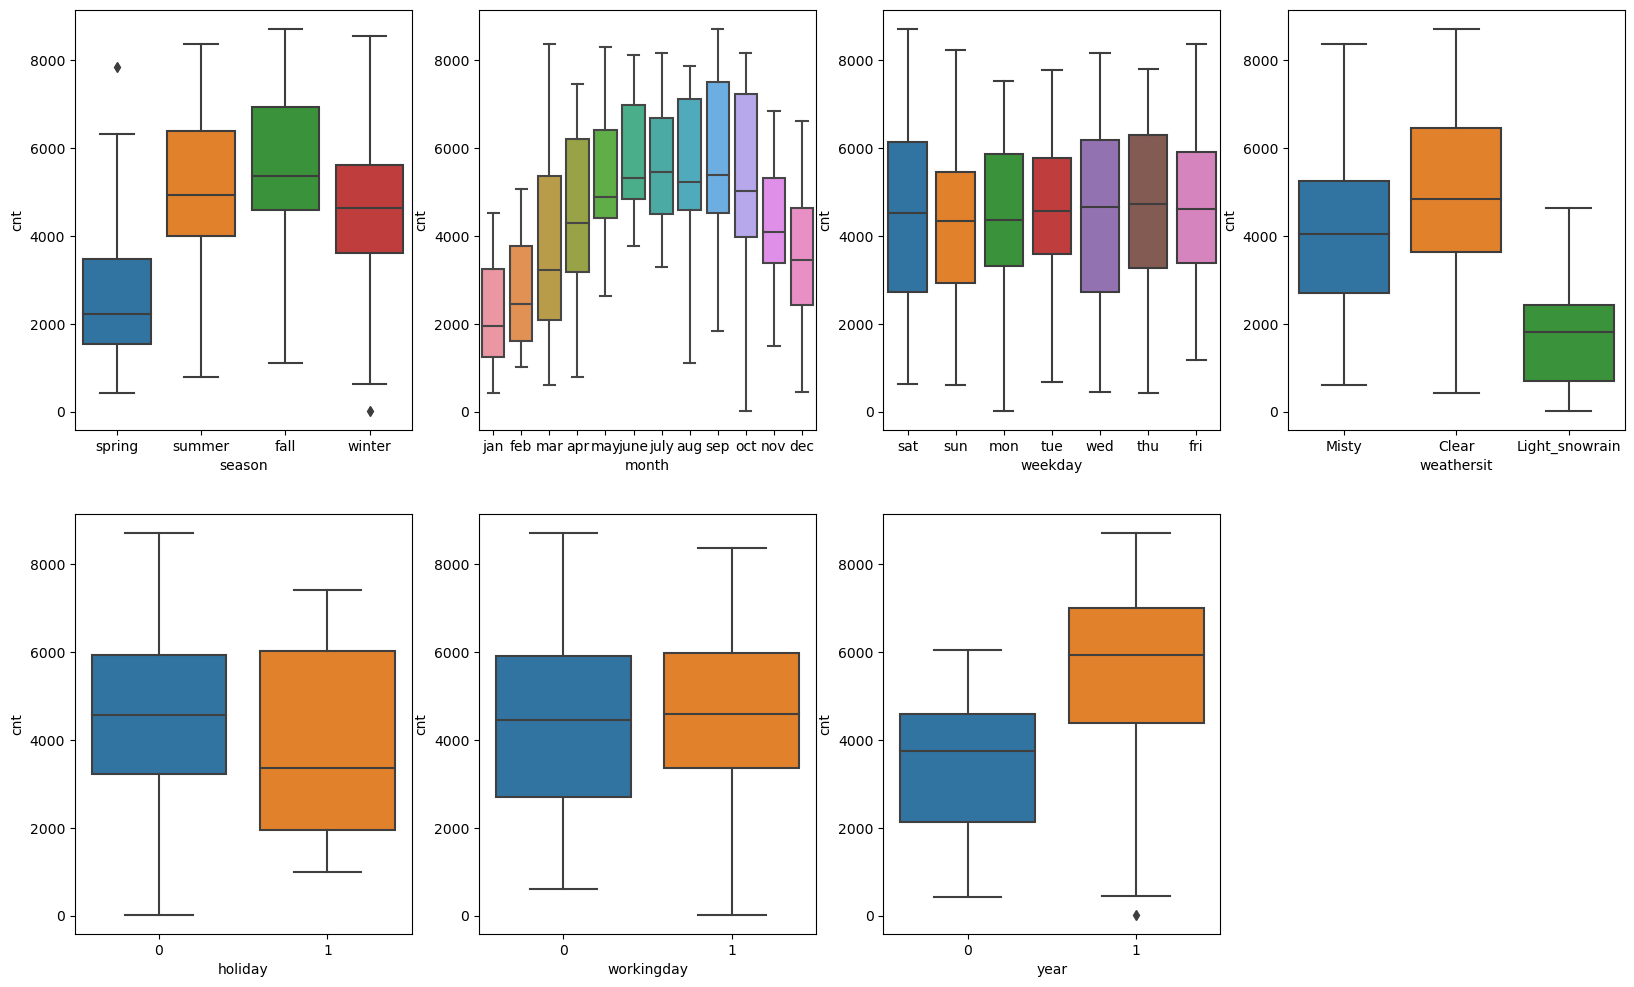

In [755]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

<Axes: xlabel='season', ylabel='cnt'>

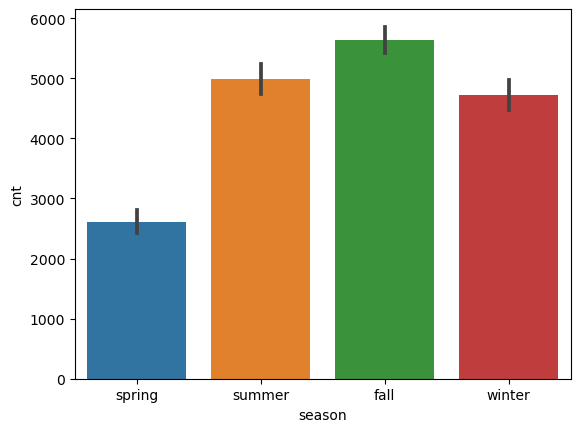

In [756]:
sns.barplot(x = 'season',
            y = 'cnt',
            data = df)

Fall season has more bike bookings

<Axes: xlabel='month', ylabel='cnt'>

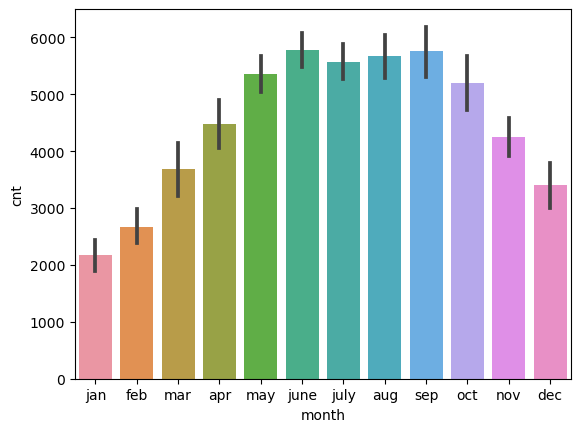

In [757]:
sns.barplot(x = 'month',
            y = 'cnt',
            data = df)

There seems to be reasonable booking from month may to october. The lowest booking is at the start of the year jan and feb.

<Axes: xlabel='weathersit', ylabel='cnt'>

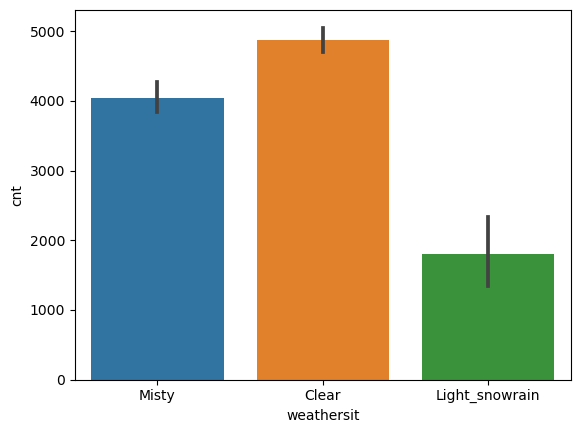

In [758]:
sns.barplot(x = 'weathersit',
            y = 'cnt',
            data = df)

Clear Weather brings more bike bookings.

<Axes: xlabel='weekday', ylabel='cnt'>

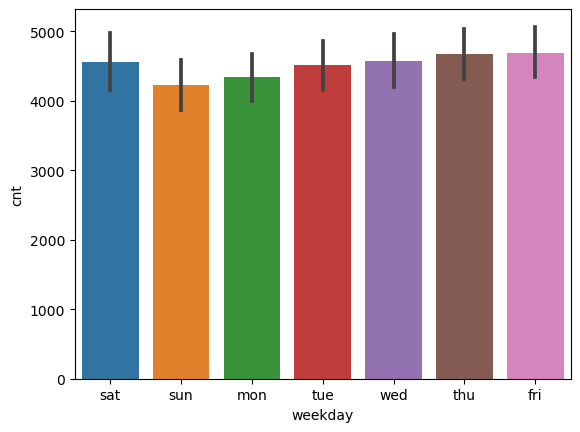

In [759]:
sns.barplot(x = 'weekday',
            y = 'cnt',
            data = df)

Booking on all days is almost follow the same pattern except on sunday its a little low

<Axes: xlabel='workingday', ylabel='cnt'>

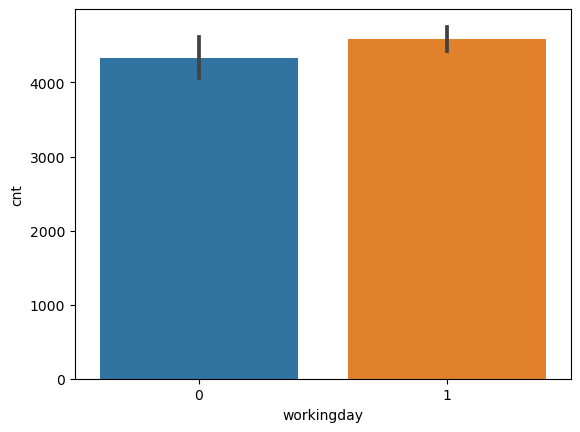

In [760]:
sns.barplot(x = 'workingday',
            y = 'cnt',
            data = df)

Equal number of bookings on working an non working days. not much of a difference here

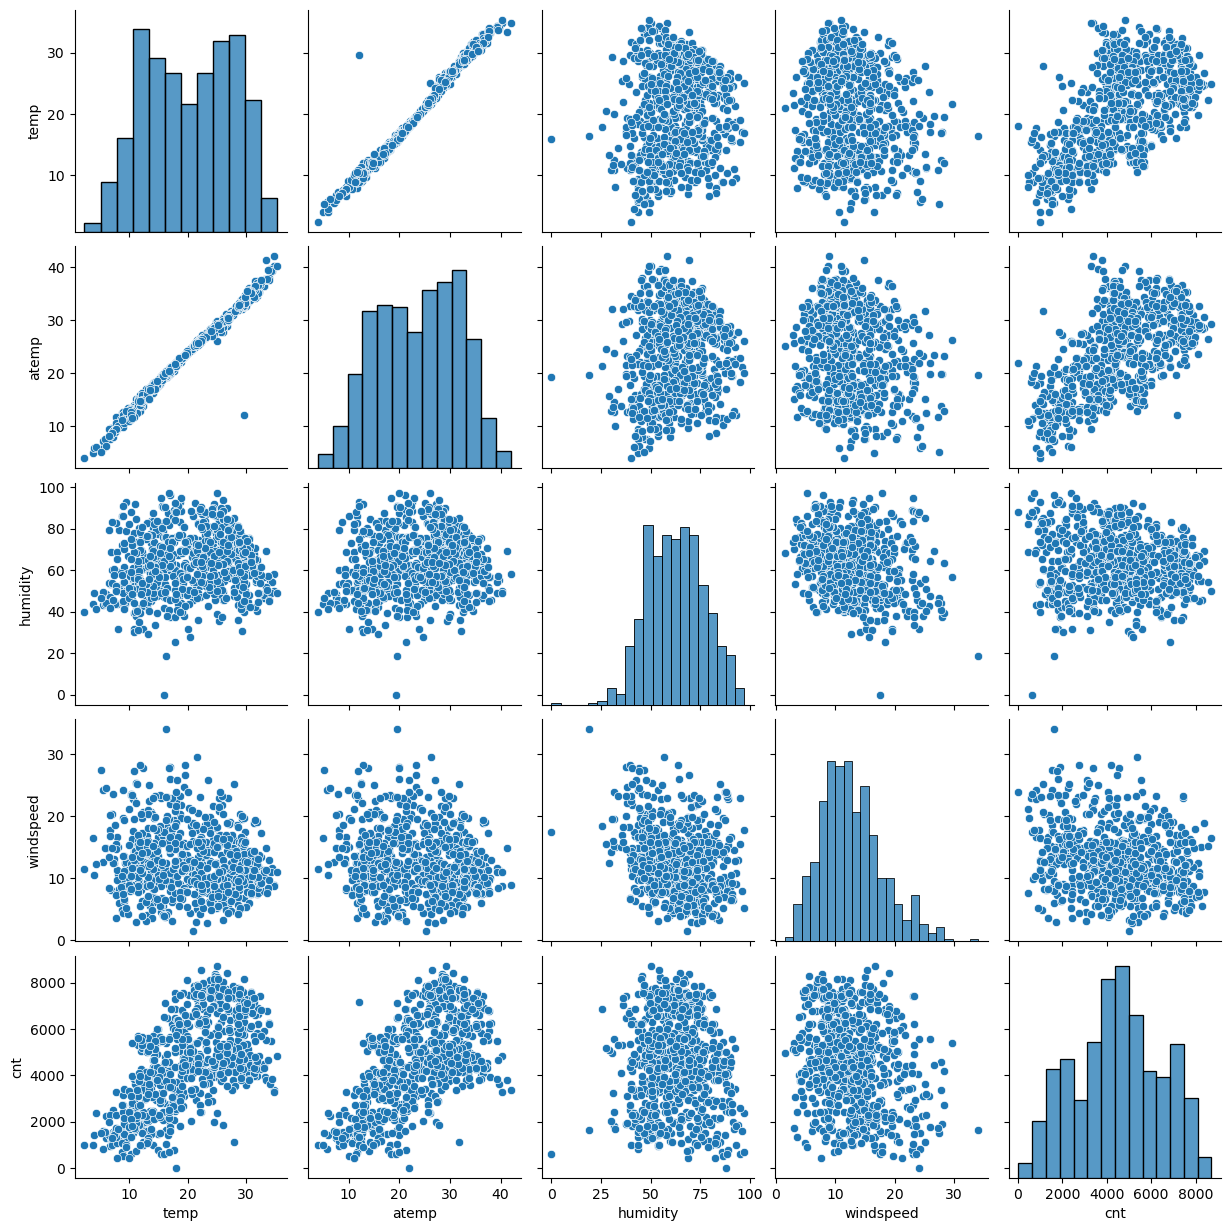

In [761]:
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

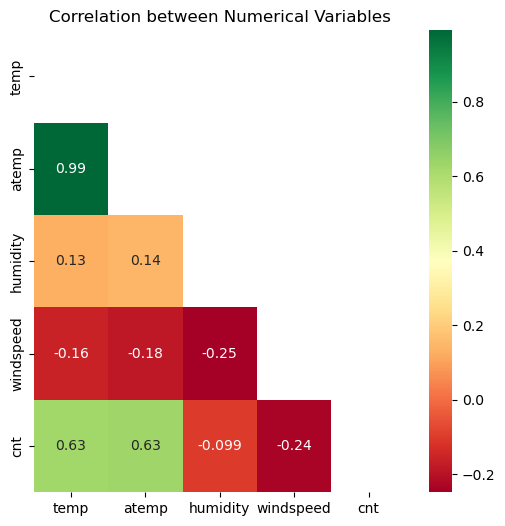

In [762]:
plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There seems to be multi collinearlity between temp and atemp. We can drop one of them.

In [763]:
# dummy variable creation
months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [764]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [765]:
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [766]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [767]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [768]:
#dropping unnecessary columns
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [769]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [770]:
df_new.shape

(730, 30)

In [771]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

Splitting data into train and test set

In [772]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [773]:
df_train.shape

(510, 12)

In [774]:
df_test.shape


(219, 12)

In [775]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [776]:
# checking test data set
df_test.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
184,fall,0,july,1,mon,0,Misty,29.793347,33.27085,63.7917,5.459106,6043
535,summer,1,june,0,wed,1,Clear,32.082500,36.04875,59.2083,7.625404,6211
299,winter,0,oct,0,thu,1,Misty,19.270000,22.85230,81.2917,13.250121,2659
221,fall,0,aug,0,wed,1,Clear,31.433347,34.24915,42.4167,13.417286,4780
152,summer,0,june,0,thu,1,Clear,29.315000,32.19710,30.5000,19.583229,4968


In [777]:
# Apply scaler() 
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [778]:
# verifying the head after appying scaling.

df_train.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
653,winter,1,oct,0,tue,1,Clear,0.509887,0.501133,0.575354,0.300794,0.864243
576,fall,1,july,0,tue,1,Clear,0.815169,0.766351,0.725633,0.264686,0.827658
426,spring,1,mar,0,sat,0,Misty,0.442393,0.438975,0.640189,0.255342,0.465255
728,spring,1,dec,0,sun,0,Clear,0.245101,0.200348,0.498067,0.663106,0.204096
482,summer,1,apr,0,sat,0,Misty,0.395666,0.391735,0.504508,0.188475,0.482973


In [779]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\raghu\AppData\Local\Temp\ipykernel_16280\3979832011.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df_train.corr())
C:\Users\raghu\AppData\Local\Temp\ipykernel_16280\3979832011.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)


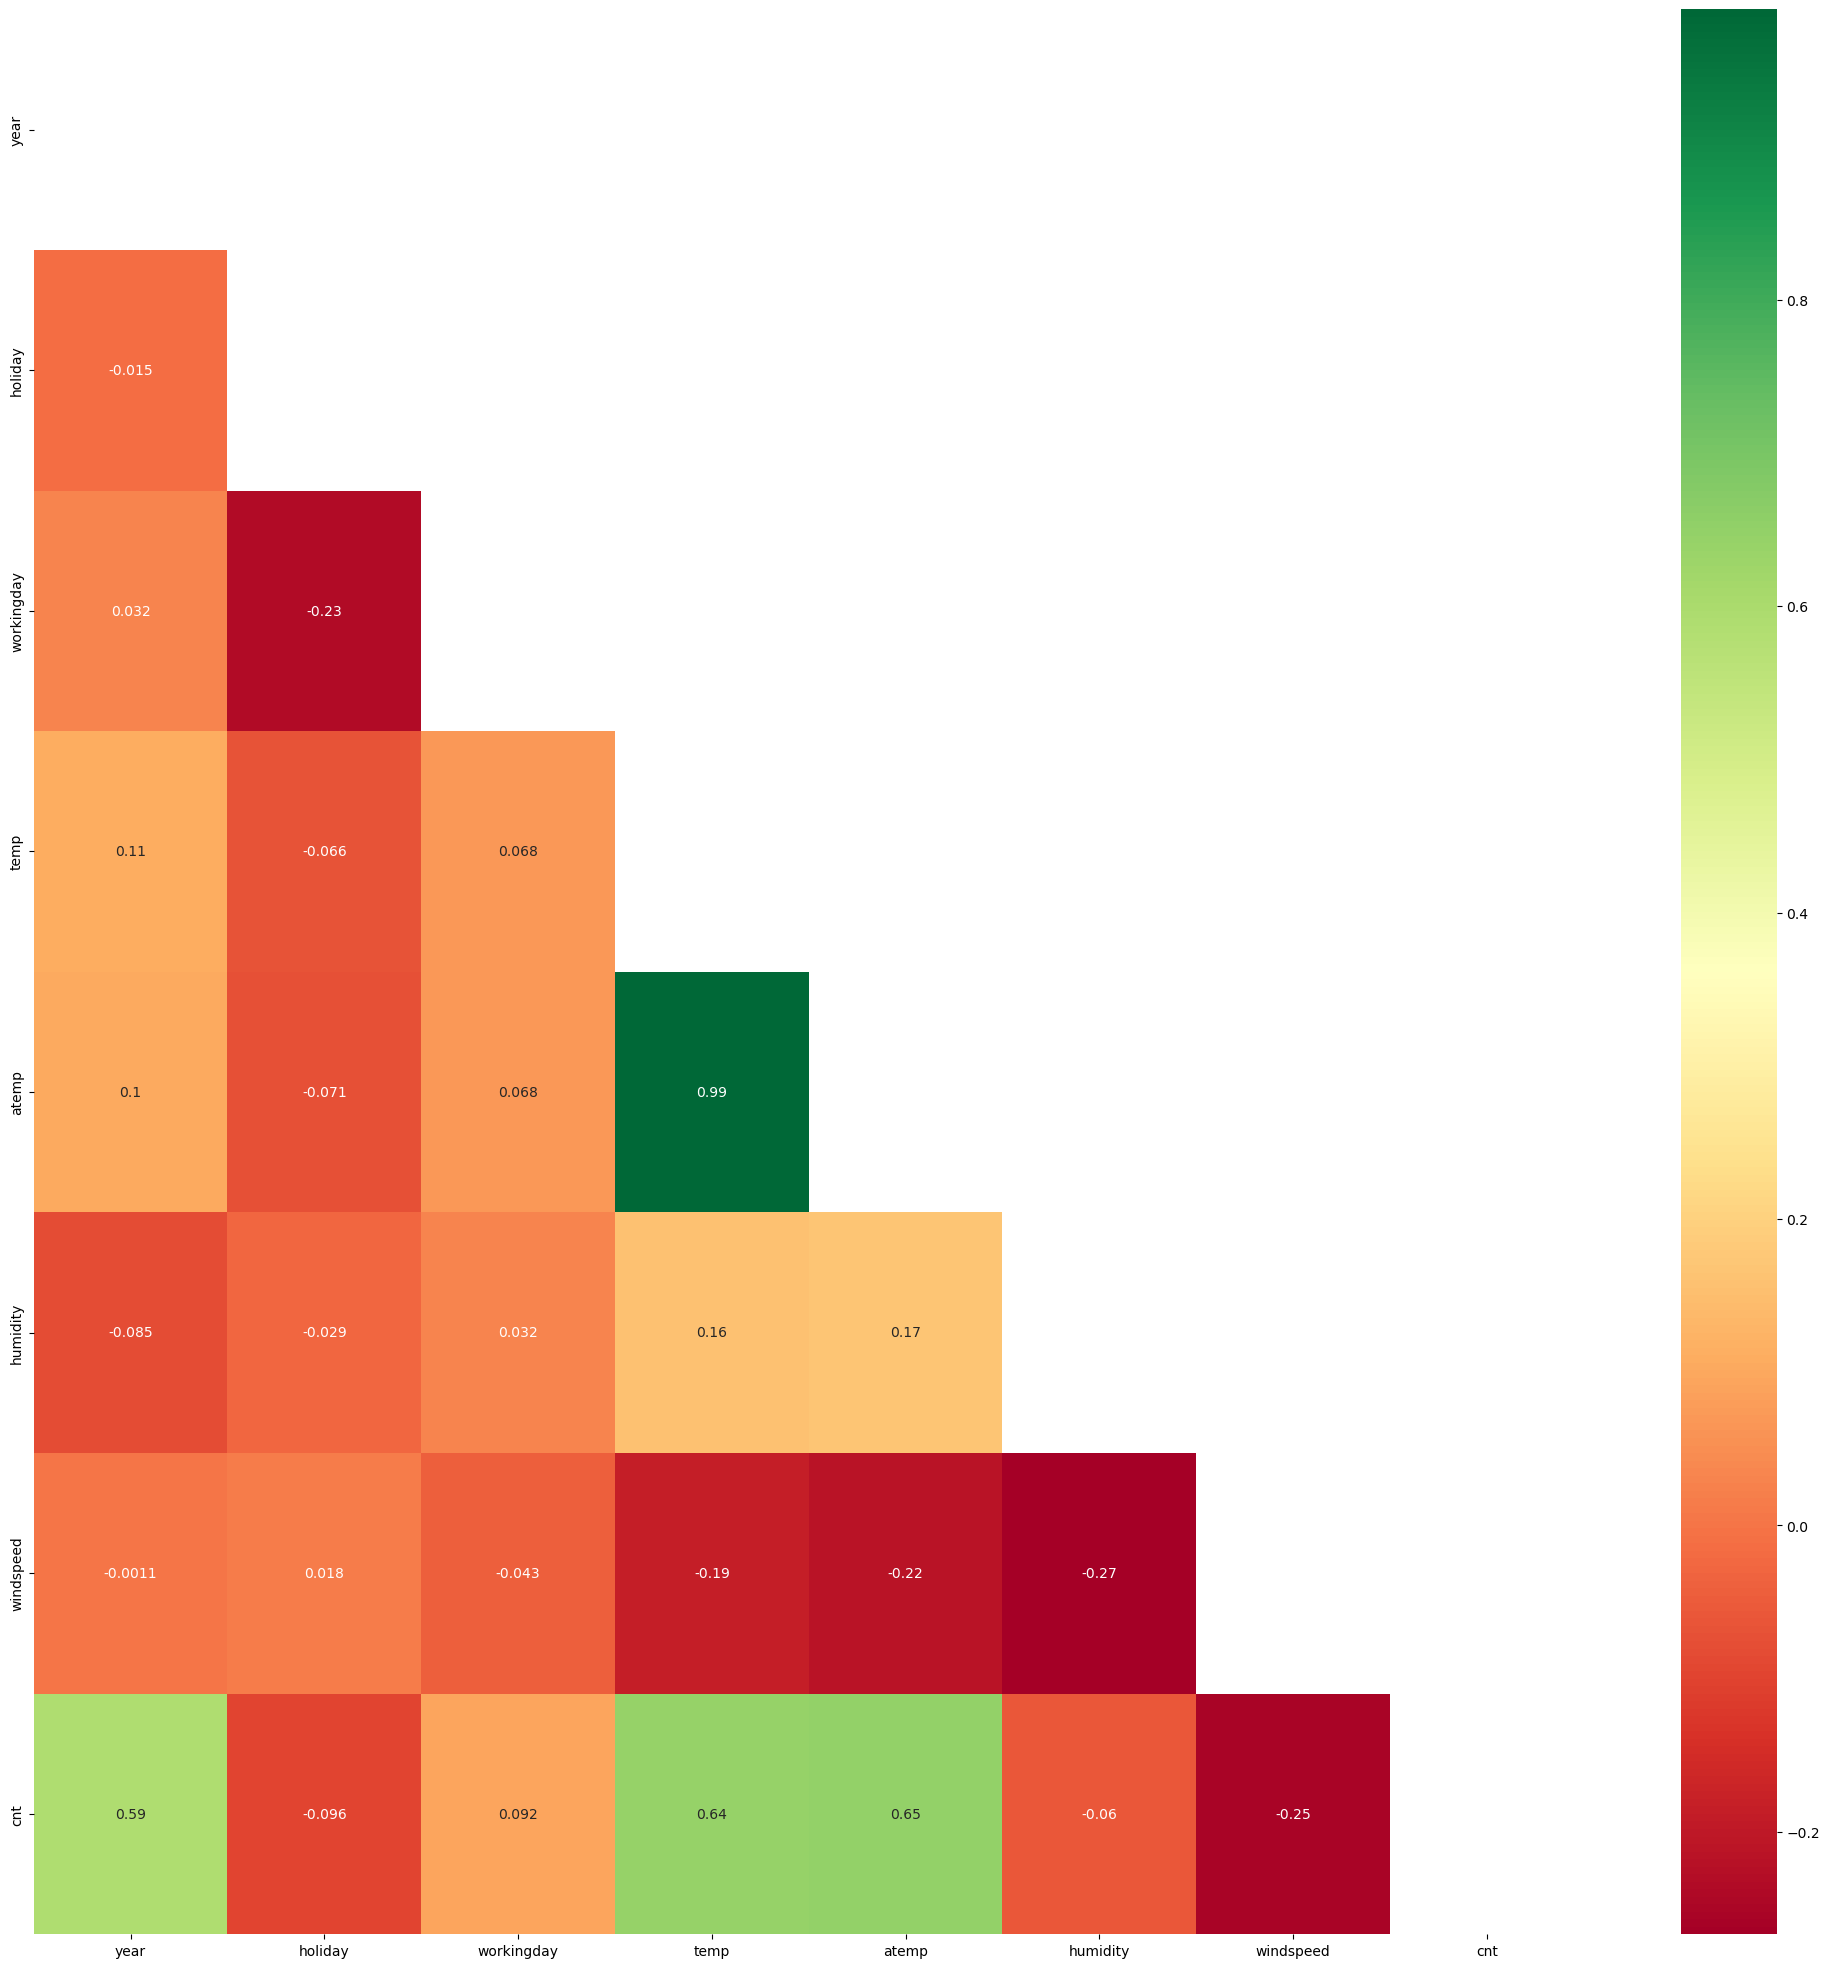

In [780]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

cnt seems to have a high co-relation with year , temp and atemp. temp and atemp co-relation to cnt values are similar. This means we can drop one of them as we foudn earlier as well. humidity and misty has hight co-relation. temp and atemp are highly co-related.

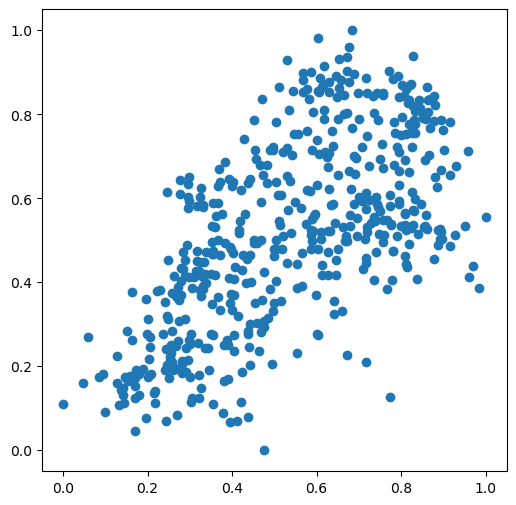

In [781]:
 #Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()


Visualization confirms the positive correlation between temp and cnt.

In [782]:
# Building the Linear Model
y_train = df_train.pop('cnt')
X_train = df_train

In [783]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15,step=1)
rfe = rfe.fit(X_train, y_train)

ValueError: could not convert string to float: 'winter'

In [ ]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)


In [ ]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

In [ ]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [784]:
X_train.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [788]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

KeyError: "['jan', 'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'] not in index"

In [786]:
# Building 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

ValueError: The indices for endog and exog are not aligned

In [787]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,sat,1.98


In [642]:
X_train_rfe.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [643]:
X_train_lm_1.columns

Index(['const', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'jan', 'july', 'sep', 'sat', 'Light_snowrain', 'Misty',
       'spring', 'summer', 'winter'],
      dtype='object')

In [645]:
lr_1.predict(X_train_rfe)

ValueError: shapes (510,15) and (16,) not aligned: 15 (dim 1) != 16 (dim 0)

C:\Users\raghu\AppData\Local\Temp\ipykernel_16280\3536760436.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

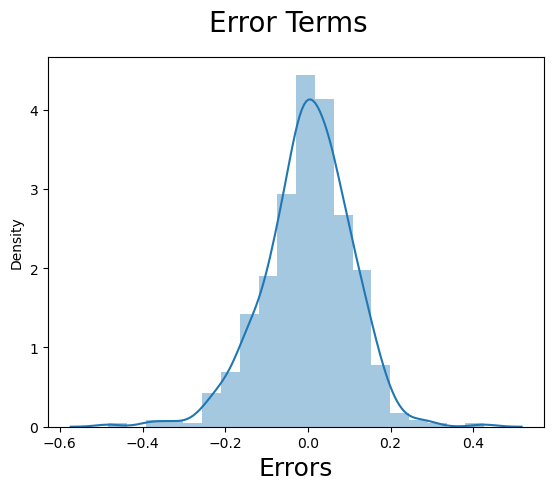

In [415]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

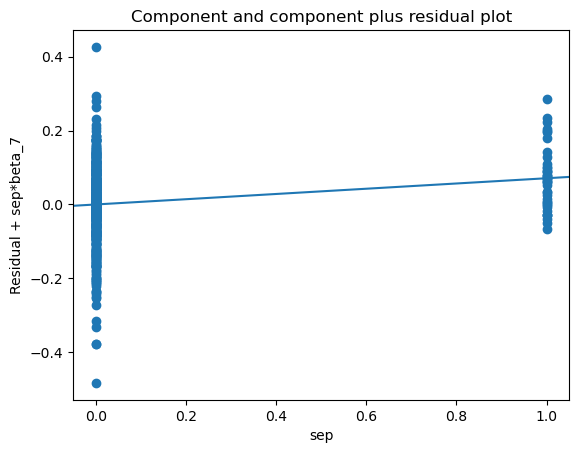

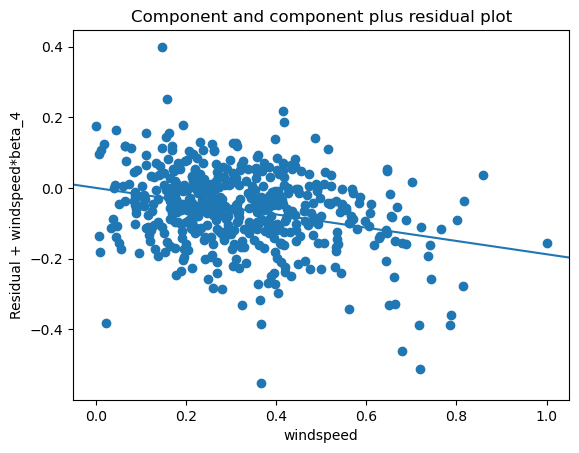

In [416]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_3, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_3, 'windspeed')
plt.show()

In [417]:
# Applying scaling on the test dataset
df_test.head()

# num_vars = ['temp','atemp','humidity','windspeed','cnt']
# df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,1,0,0,0,0,0,1,0


In [418]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,20.808400,24.250312,61.934025,12.598352,4560.559091,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,7.672796,8.281075,14.429542,4.973534,1904.968544,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [419]:
# checking train data set
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [420]:
df_test.shape

(220, 30)

In [421]:
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,1,0,0,0,0,0,1,0


In [422]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [423]:
y_test = df_test.pop('cnt')
X_test = df_test

In [424]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [425]:
# Index(['const', 'year', 'holiday', 'workingday', 'windspeed', 'jan', 'july',
#        'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
#       dtype='object
X_test_m4.columns

Index(['const', 'year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may',
       'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [426]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop([ "atemp", "humidity","aug","dec","feb","june","mar","may","nov","oct","mon","sun","thu","tue","wed"], axis = 1)

In [429]:
X_test_m4.shape

(220, 15)

In [430]:
X_train_lm_3.columns

Index(['const', 'year', 'holiday', 'workingday', 'windspeed', 'jan', 'july',
       'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [431]:
X_test_m4.columns

Index(['const', 'year', 'holiday', 'workingday', 'temp', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [433]:
X_test_m4 = X_test_m4.drop(["temp"],axis=1)

In [434]:
# Making predictions using the fourth model
y_pred_m4 = lr_3.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

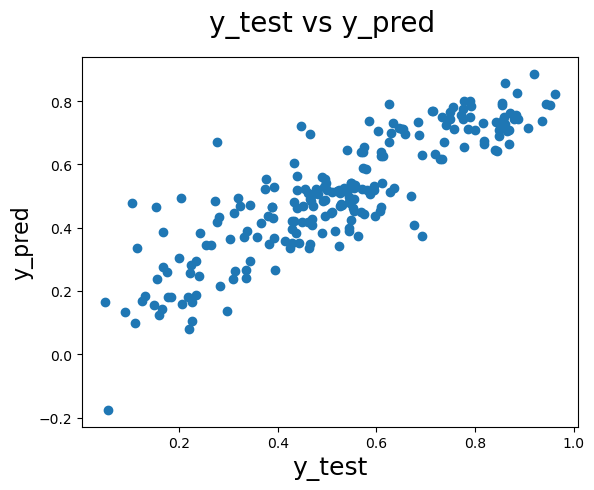

In [435]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [436]:
round(lr_3.params,4)

const             0.5444
year              0.2478
holiday          -0.0567
workingday        0.0478
windspeed        -0.1878
jan              -0.1026
july             -0.0095
sep               0.0710
sat               0.0562
Light_snowrain   -0.3034
Misty            -0.0882
spring           -0.2602
summer           -0.0427
winter           -0.0762
dtype: float64

cnt= 0.5444+0.2478*year-0.0567*holiday+0.0478*workingday-0.1879*windspeed-0.1026*jan-0.0095*july+0.0710*sep+0.0562*sat-0.3034*Light_snowrain-0.0882*Misty-0.2602*spring-0.0427*summer-0.0762*winter

In [441]:
r2 = r2_score(y_test, y_pred_m4)
round(r2,4)

0.7397

In [442]:
#We can see that the equation of our best fitted line is:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test_m4.shape[0]-1)/(X_test_m4.shape[0]-X_test_m4.shape[1]-1),4)
print(adjusted_r2)

0.7219
